In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from pyBKT.models import Model


# data set prepreration


the cognitive tutor data set will be used to model the pybkt model. the dataset will be processed to fit the current task

In [3]:

model = Model(seed = 42, num_fits = 1)

In [68]:
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [4]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [5]:
ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2269552,3024833,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-256,1,RationalNumberline1,2007-01-17 12:43:38.0,2007-01-17 12:44:07.0,2007-01-17 12:44:13.0,2007-01-17 12:44:13.0,35.00100,NaN,35.00100,0,3,1,1,Plot imperfect radical,4
16853,2269553,3024834,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-124,1,RationalNumberline1,2007-01-17 12:44:17.0,2007-01-17 12:44:37.0,2007-01-17 12:44:42.0,2007-01-17 12:44:42.0,25.00000,NaN,25.00000,0,1,0,1,Plot decimal - thousandths,2
16854,2269555,3024836,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-193,1,RationalNumberline1,2007-01-17 12:44:59.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,17.00000,17.00000,NaN,1,0,0,1,Plot imperfect radical,5
16855,2269557,3024838,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-280,1,RationalNumberline1,2007-01-25 13:46:30.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,22.00000,22.00000,NaN,1,0,0,1,Plot decimal - thousandths,3


simple prediction to check if the column used is the correct first attempt column or corrects attempt

In [71]:
model.fit(data=ct_df)

In [72]:
predicted_results = model.predict(data=ct_df)

In [30]:
predicted_results[['Row','Anon Student Id', 'KC(Default)', 'Correct First Attempt', 'correct_predictions', 'state_predictions']]

,Row,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,112149,0I891Gg,Plot non-terminating improper fraction,0,0.51689,0.59024
774,112151,0I891Gg,Plot imperfect radical,0,0.25226,0.22330
775,112156,0I891Gg,Plot terminating proper fraction,0,0.48173,0.50636
776,112157,0I891Gg,Plot pi,1,0.67695,0.26272
777,112159,0I891Gg,Plot terminating proper fraction,1,0.44173,0.40755
...,...,...,...,...,...,...
2004,310760,zt5vuLM,Calculate part in proportion with fractions,1,0.86775,0.98830
2005,310772,zt5vuLM,Calculate total in proportion with fractions,1,0.80079,0.89249
2006,310784,zt5vuLM,Calculate part in proportion with fractions,1,0.87070,0.99490
2007,310796,zt5vuLM,Calculate total in proportion with fractions,1,0.85086,0.97523


converting sampling the cognitive tutor data set to make a data set of similar size and for to the one i need

In [6]:
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [7]:
ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2269552,3024833,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-256,1,RationalNumberline1,2007-01-17 12:43:38.0,2007-01-17 12:44:07.0,2007-01-17 12:44:13.0,2007-01-17 12:44:13.0,35.00100,NaN,35.00100,0,3,1,1,Plot imperfect radical,4
16853,2269553,3024834,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-124,1,RationalNumberline1,2007-01-17 12:44:17.0,2007-01-17 12:44:37.0,2007-01-17 12:44:42.0,2007-01-17 12:44:42.0,25.00000,NaN,25.00000,0,1,0,1,Plot decimal - thousandths,2
16854,2269555,3024836,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-193,1,RationalNumberline1,2007-01-17 12:44:59.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,2007-01-17 12:45:16.0,17.00000,17.00000,NaN,1,0,0,1,Plot imperfect radical,5
16855,2269557,3024838,248ck2dj1,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-280,1,RationalNumberline1,2007-01-25 13:46:30.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,2007-01-25 13:46:52.0,22.00000,22.00000,NaN,1,0,0,1,Plot decimal - thousandths,3


In [8]:
ct_df['Anon Student Id'].value_counts()

Anon Student Id
1T4w47X         84
271np4zc8vd1    68
171s0AHa        66
248iwnoa3       62
171TsMI6        62
                ..
271szevzza4w     3
171N6L94         2
225jFfJy6_a      2
BU25p0d          2
2711lacn64nc     1
Name: count, Length: 587, dtype: int64

In [9]:

top_100_students = ct_df['Anon Student Id'].value_counts().head(100).index

ct_df = ct_df[ct_df['Anon Student Id'].isin(top_100_students)]

ct_df

,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
10,3963,5289,3cjD21W,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-10-18 14:28:49.0,2006-10-18 14:28:58.0,2006-10-18 14:28:58.0,2006-10-18 14:28:58.0,9.00000,9.00000,NaN,1,0,0,1,Calculate unit rate,1
11,3974,5300,3cjD21W,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-10-18 14:29:27.0,2006-10-18 14:29:32.0,2006-10-18 14:30:29.0,2006-10-18 14:30:29.0,35.00000,NaN,35.00000,0,4,1,1,Calculate unit rate,2
12,3986,5312,3cjD21W,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-071,1,SimplifiedNumeratorQuantity1,2006-10-23 13:59:48.0,2006-10-23 13:59:55.0,2006-10-23 14:01:14.0,2006-10-23 14:01:14.0,63.00000,NaN,63.00000,0,3,1,1,Calculate unit rate,3
13,3992,5318,3cjD21W,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-071,1,SimplifiedNumeratorQuantity2,2006-10-23 14:01:32.0,2006-10-23 14:02:38.0,2006-10-23 14:03:15.0,2006-10-23 14:03:15.0,103.00000,NaN,103.00000,0,1,0,1,Calculate unit rate,4
14,4006,5332,3cjD21W,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-099,1,SimplifiedNumeratorQuantity1,2006-10-23 14:04:16.0,2006-10-23 14:04:28.0,2006-10-23 14:04:39.0,2006-10-23 14:04:39.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,2260243,3012383,2489k0q4s,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-154,1,RationalNumberline1,2007-01-17 12:44:21.0,2007-01-17 12:44:35.0,2007-01-17 12:44:35.0,2007-01-17 12:44:35.0,14.00000,14.00000,NaN,1,0,0,1,Plot decimal - thousandths,3
16754,2260245,3012385,2489k0q4s,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-193,1,RationalNumberline1,2007-01-17 12:44:52.0,2007-01-17 12:45:32.0,2007-01-17 12:45:32.0,2007-01-17 12:45:32.0,40.00000,40.00000,NaN,1,0,0,1,Plot imperfect radical,2
16755,2260253,3012393,2489k0q4s,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-284,1,RationalNumberline1,2007-01-25 13:49:54.0,2007-01-25 13:50:13.0,2007-01-25 13:50:13.0,2007-01-25 13:50:13.0,19.00000,19.00000,NaN,1,0,0,1,Plot pi,2
16756,2260258,3012398,2489k0q4s,"Unit RATIONAL-IRRATIONAL-NUMBERS, Section RATI...",RATIONAL1-100,1,RationalNumberline1,2007-01-25 13:51:55.0,2007-01-25 13:52:13.0,2007-01-25 13:52:15.0,2007-01-25 13:52:15.0,20.00000,NaN,20.00000,0,1,0,1,Plot non-terminating improper fraction,4


In [80]:
ct_df['Anon Student Id'].value_counts()

Anon Student Id
1T4w47X         84
271np4zc8vd1    68
171s0AHa        66
171TsMI6        62
248iwnoa3       62
171cjhjb        61
248vthf5i       58
248g1wh6o       56
248llcp7q       56
2365c1xmz       56
248zczb3i       56
271ti60q7tk1    56
2717y42x1chj    56
271ecl1bmic8    55
248mbp1cf       54
248v9pgu8       54
171nKnHW        54
2481ihli2       54
248c8w56g       53
248lmchx5       53
i0PeR6q         53
271kfquu32qa    52
3cjD21W         52
2480wql4f       51
24864dslr       51
XqcnV           51
4gcLyqe         50
248clu9mj       50
248g1paph       50
271tt6j61n7d    50
2480hxxcx       50
271vysg05m7y    49
271lda2pl3j5    49
171uTM54        48
248qm8h48       48
zt5vuLM         48
248nb4uyh       48
248429wl4       48
2718vytyrz9p    48
248f1q8y5       48
236x225jc       48
248hh7azg       48
248abpghv       48
2489k0q4s       48
24899b8f6       47
248oylglm       47
271k966j74lv    47
2716lls020qk    47
HsN9sHn         47
2489c9lbg       47
Name: count, dtype: int64

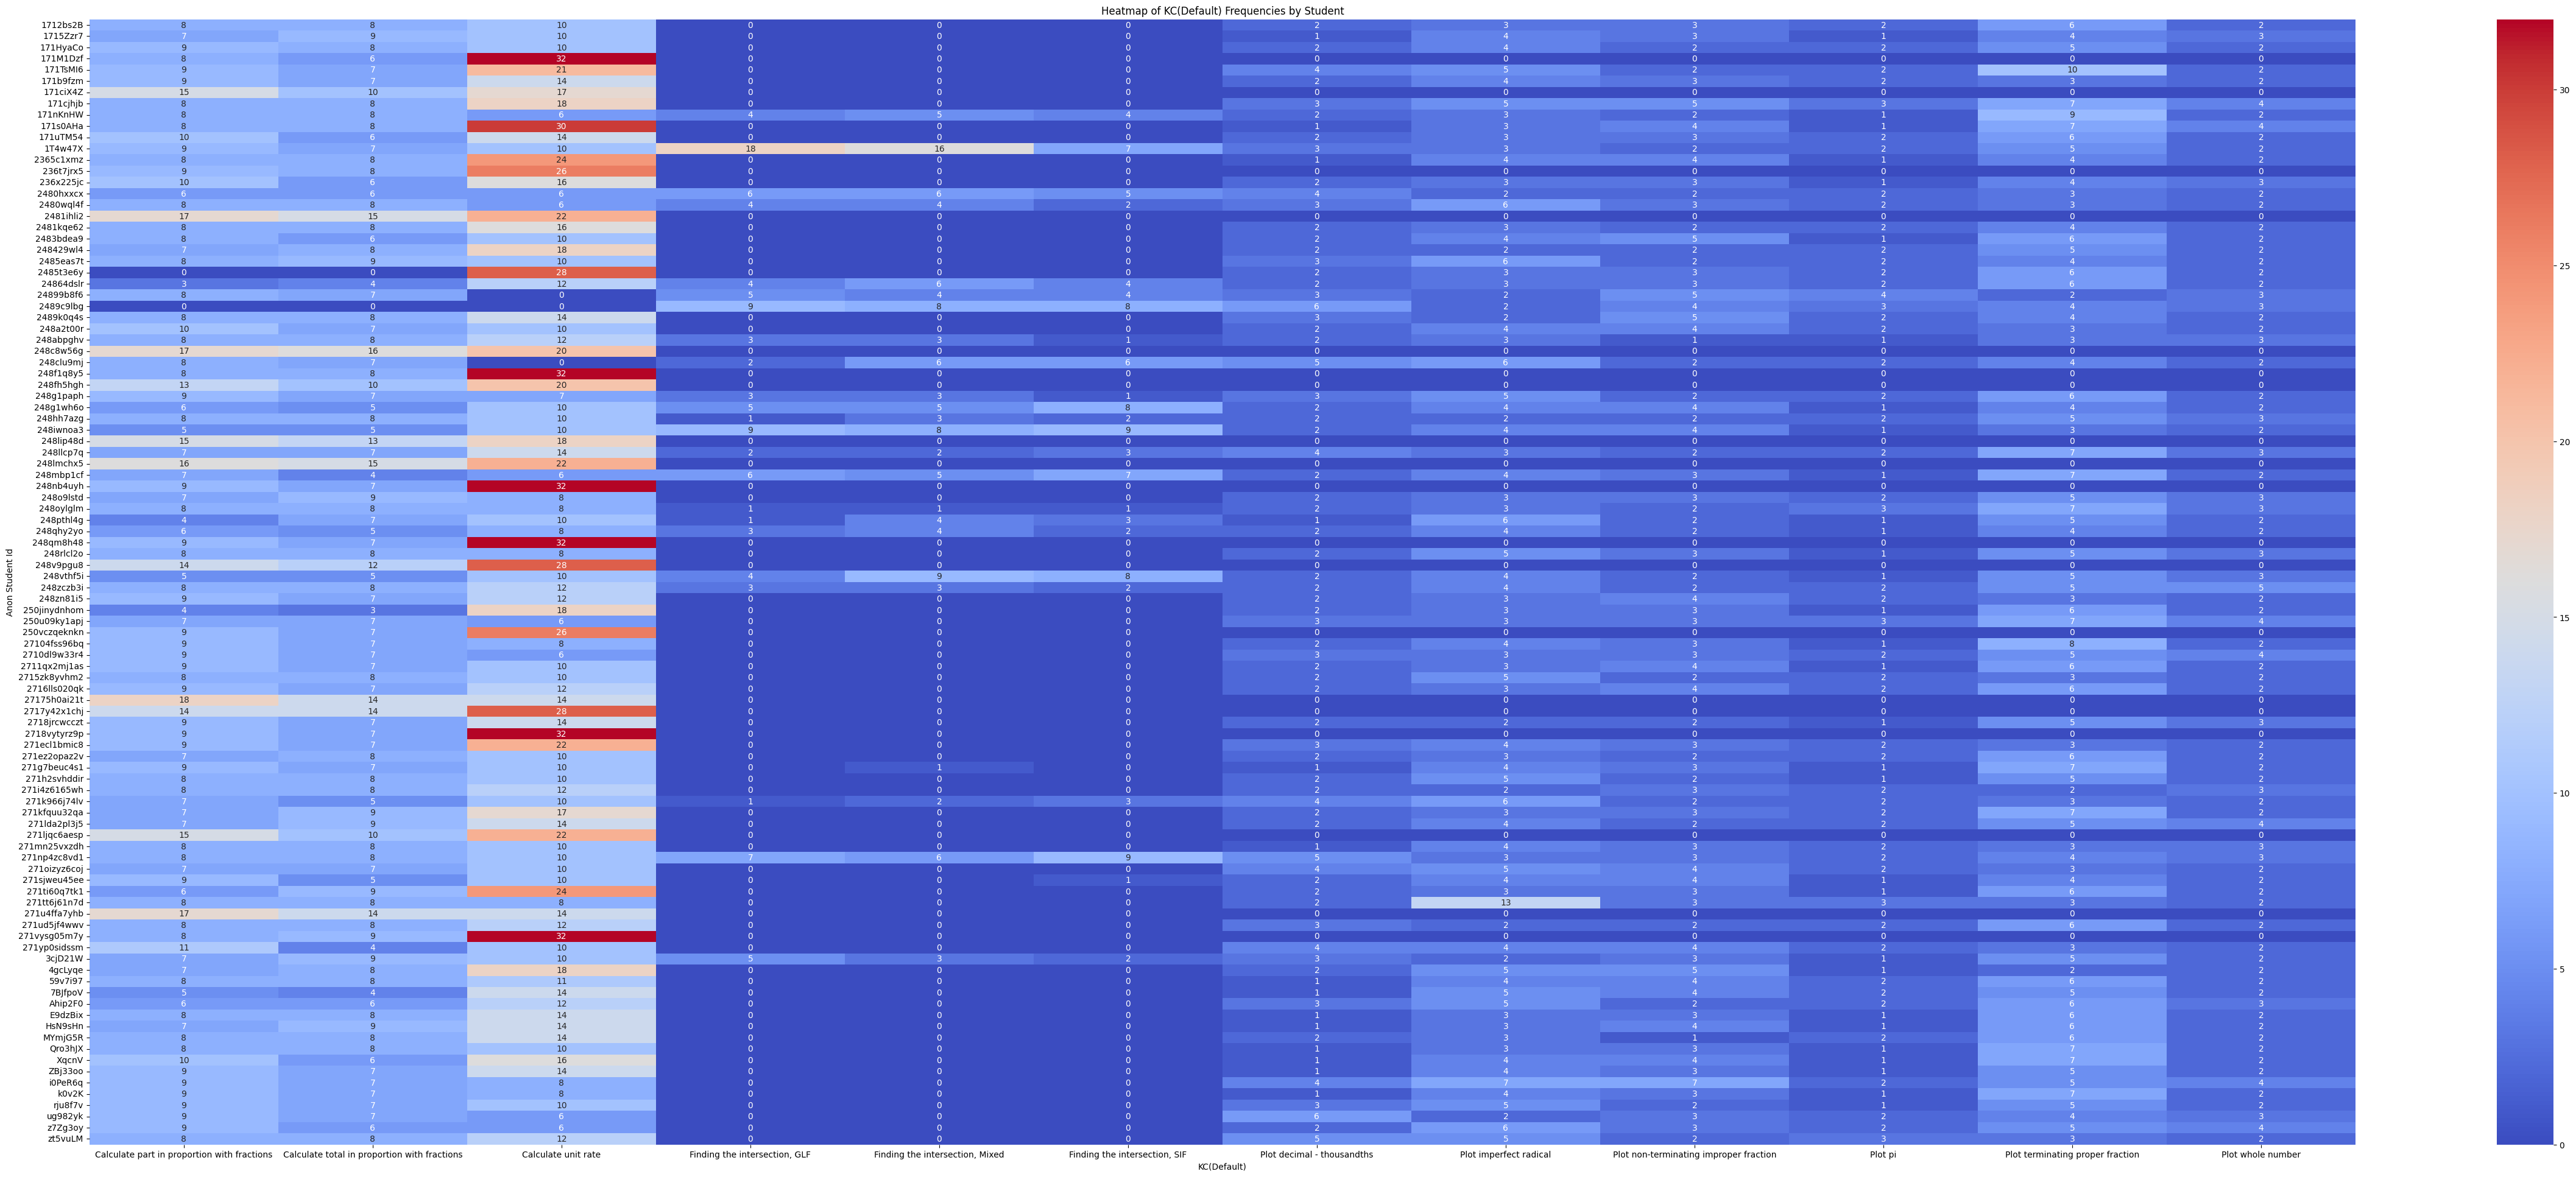

In [11]:

heatmap_data = ct_df.groupby(['Anon Student Id', 'KC(Default)']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(60, 24))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of KC(Default) Frequencies by Student')
plt.xlabel('KC(Default)')
plt.ylabel('Anon Student Id')
plt.show()


In [12]:
ct_df.columns

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')

In [13]:
ct_df = ct_df[['Row','Anon Student Id','KC(Default)','Correct First Attempt','Hints',]]

In [14]:
ct_df

,Row,Anon Student Id,KC(Default),Correct First Attempt,Hints
10,5289,3cjD21W,Calculate unit rate,1,0
11,5300,3cjD21W,Calculate unit rate,0,1
12,5312,3cjD21W,Calculate unit rate,0,1
13,5318,3cjD21W,Calculate unit rate,0,0
14,5332,3cjD21W,Calculate unit rate,0,0
...,...,...,...,...,...
16753,3012383,2489k0q4s,Plot decimal - thousandths,1,0
16754,3012385,2489k0q4s,Plot imperfect radical,1,0
16755,3012393,2489k0q4s,Plot pi,1,0
16756,3012398,2489k0q4s,Plot non-terminating improper fraction,0,0


In [17]:
ct_df.to_csv('../Data/cleanedUserData.csv')

,Row,Anon Student Id,KC(Default),Correct First Attempt,Hints
10,5289,3cjD21W,Calculate unit rate,1,0
11,5300,3cjD21W,Calculate unit rate,0,1
12,5312,3cjD21W,Calculate unit rate,0,1
13,5318,3cjD21W,Calculate unit rate,0,0
14,5332,3cjD21W,Calculate unit rate,0,0
...,...,...,...,...,...
16753,3012383,2489k0q4s,Plot decimal - thousandths,1,0
16754,3012385,2489k0q4s,Plot imperfect radical,1,0
16755,3012393,2489k0q4s,Plot pi,1,0
16756,3012398,2489k0q4s,Plot non-terminating improper fraction,0,0


# Model fitting

In [20]:
data = pd.read_csv("../Data/cleanedUserData.csv")

In [57]:

defaults = {'order_id': 'Row', 'skill_name': 'KC(Default)', 'correct': 'Correct First Attempt'}

model.fit(data = data, defaults = defaults)

model.params()

value
skill                                        param   class          
Calculate unit rate                          prior   default 0.34003
                                             learns  default 0.06786
                                             guesses default 0.32576
                                             slips   default 0.34610
                                             forgets default 0.00000
Calculate part in proportion with fractions  prior   default 0.52994
                                             learns  default 0.09355
                                             guesses default 0.33965
                                             slips   default 0.11620
                                             forgets default 0.00000
Calculate total in proportion with fractions prior   default 0.48855
                                             learns  default 0.25058
                                             guesses default 0.17939
                                             slips   default 0.16274
                                             forgets default 0.00000
Plot non-terminating improper fraction       prior   default 0.24649
                                             learns  default 0.02412
                                             guesses default 0.38761
                                             slips   default 0.08087
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.29461
                                             learns  default 0.10281
                                             guesses default 0.28170
                                             slips   default 0.19608
                                             forgets default 0.00000
Plot whole number                            prior   default 0.24443
                                             learns  default 0.43253
                                             guesses default 0.70897
                                             slips   default 0.00405
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.18926
                                             learns  default 0.02089
                                             guesses default 0.21154
                                             slips   default 0.12779
                                             forgets default 0.00000
Plot pi                                      prior   default 0.34900
                                             learns  default 0.06991
                                             guesses default 0.62014
                                             slips   default 0.15612
                                             forgets default 0.00000
Plot decimal - thousandths                   prior   default 0.07239
                                             learns  default 0.36319
                                             guesses default 0.06545
                                             slips   default 0.21802
                                             forgets default 0.00000
Finding the intersection, Mixed              prior   default 0.43310
                                             learns  default 0.16594
                                             guesses default 0.24168
                                             slips   default 0.24121
                                             forgets default 0.00000
Finding the intersection, GLF                prior   default 0.81209
                                             learns  default 0.17982
                                             guesses default 0.03740
                                             slips   default 0.37655
                                             forgets default 0.00000
Finding the intersection, SIF                prior   default 0.48680
                                             learns  default 

In [58]:

training_acc = model.evaluate(data = ct_df, metric = 'accuracy')
training_acc

0.6362604087812264

In [60]:
training_rmse = model.evaluate(data = ct_df)
training_rmse


0.46190586825713836

In [61]:

training_auc = model.evaluate(data_path = 'ct.csv', metric = 'auc')
training_auc

0.6947231900526434

Cross validation

In [25]:


crossvalidated_errors = model.crossvalidate(data=data, folds = 5)
crossvalidated_errors

,rmse
skill,
Calculate unit rate,0.49527
Calculate part in proportion with fractions,0.43058
Calculate total in proportion with fractions,0.43785
Plot pi,0.44837
Plot imperfect radical,0.43909
Plot non-terminating improper fraction,0.49181
Plot decimal - thousandths,0.43820
Plot terminating proper fraction,0.49544
Plot whole number,0.34483


In [26]:
crossvalidated_errors = model.crossvalidate(data=data, folds = 5,metric='auc')
crossvalidated_errors

,auc
skill,
Calculate unit rate,0.56194
Calculate part in proportion with fractions,0.67368
Calculate total in proportion with fractions,0.67200
Plot pi,0.62999
Plot imperfect radical,0.57997
Plot non-terminating improper fraction,0.63698
Plot decimal - thousandths,0.68119
Plot terminating proper fraction,0.53823
Plot whole number,0.47529


In [28]:
crossvalidated_errors = model.crossvalidate(data=data, folds = 5,metric='log_loss')
crossvalidated_errors

,log_loss
skill,
Calculate unit rate,0.67812
Calculate part in proportion with fractions,0.56038
Calculate total in proportion with fractions,0.56926
Plot pi,0.61610
Plot imperfect radical,0.57105
Plot non-terminating improper fraction,0.65896
Plot decimal - thousandths,0.57416
Plot terminating proper fraction,0.68805
Plot whole number,0.40906
